<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Pandas for Exploratory Data Analysis - Cont



---

## Learning Objectives

- Define what Pandas is and how it relates to data science.
- Manipulate Pandas `DataFrames` and `Series`.
- Filter and sort data using Pandas.
- Manipulate `DataFrame` columns.
- Know how to handle null and missing values.

## Lesson Guide

- [What Is Pandas?](#pandas)
- [Reading Files, Selecting Columns, and Summarizing](#reading-files)
    - [Exercise 1](#exercise-one)
    
    
- [Filtering and Sorting](#filtering-and-sorting)
    - [Exercise 2](#exercise-two)
    
    
- [Renaming, Adding, and Removing Columns](#columns)
- [Handling Missing Values](#missing-values)
    - [Exercise 3](#exercise-three)
    
    
- [Split-Apply-Combine](#split-apply-combine)
    - [Exercise 4](#exercise-four)
    
    
- [Selecting Multiple Columns and Filtering Rows](#multiple-columns)
- [Joining (Merging) DataFrames](#joining-dataframes)
- [OPTIONAL: Other Commonly Used Features](#other-features)
- [OPTIONAL: Other Less Used Features of Pandas](#uncommon-features)
- [Summary](#summary)

<a id="pandas"></a>

## What Is Pandas?

- **Objective:** Define what Pandas is and how it relates to data science.

Pandas is a Python library that primarily adds two new datatypes to Python: `DataFrame` and `Series`.

- A `Series` is a sequence of items, where each item has a unique label (called an `index`).
- A `DataFrame` is a table of data. Each row has a unique label (the `row index`), and each column has a unique label (the `column index`).
- Note that each column in a `DataFrame` can be considered a `Series` (`Series` index).

> Behind the scenes, these datatypes use the NumPy ("Numerical Python") library. NumPy primarily adds the `ndarray` (n-dimensional array) datatype to Pandas. An `ndarray` is similar to a Python list — it stores ordered data. However, it differs in three respects:
> - Each element has the same datatype (typically fixed-size, e.g., a 32-bit integer).
> - Elements are stored contiguously (immediately after each other) in memory for fast retrieval.
> - The total size of an `ndarray` is fixed.

> Storing `Series` and `DataFrame` data in `ndarray`s makes Pandas faster and uses less memory than standard Python datatypes. Many libraries (such as scikit-learn) accept `ndarray`s as input rather than Pandas datatypes, so we will frequently convert between them.


### Using Pandas

Pandas is frequently used in data science because it offers a large set of commonly used functions, is relatively fast, and has a large community. Because many data science libraries also use NumPy to manipulate data, you can easily transfer data between libraries (as we will often do in this class!).

Pandas is a large library that typically takes a lot of practice to learn. It heavily overrides Python operators, resulting in odd-looking syntax. For example, given a `DataFrame` called `cars` which contains a column `mpg`, we might want to view all cars with mpg over 35. To do this, we might write: `cars[cars['mpg'] > 35]`. In standard Python, this would most likely give a syntax error. (**Challenge:** Using only built-in datatypes, can you define `cars` and `mpg` to make this expression valid?)

Pandas also highly favors certain patterns of use. For example, looping through a `DataFrame` row by row is highly discouraged. Instead, Pandas favors using **vectorized functions** that operate column by column. (This is because each column is stored separately as an `ndarray`, and NumPy is optimized for operating on `ndarray`s.)

Do not be discouraged if Pandas feels overwhelming. Gradually, as you use it, you will become familiar with which methods to use and the "Pandas way" of thinking about and manipulating data.

### Class Methods and Attributes

Pandas `DataFrame`s are Pandas class objects and therefore come with attributes and methods. To access these, follow the variable name with a dot. For example, given a `DataFrame` called `users`:

```
- users.index       # accesses the `index` attribute -- note there are no parentheses. attributes are not callable
- users.head()      # calls the `head` method (since there are open/closed parentheses)
- users.head(10)    # calls the `head` method with parameter `10`, indicating the first 10 rows. this is the same as:
- users.head(n=10)  # calls the `head` method, setting the named parameter `n` to have a value of `10`.
```

We know that the `head` method accepts one parameter with an optional name of `n` because it is in the documentation for that method. Let's see how to view the documentation next.

### Viewing Documentation

There are a few ways to find more information about a method.

**Method 1:** In Jupyter, you can quickly view documentation for a method by following the method name by a `?`, as follows:

```
users.head?
```

> ```
Signature: users.head(n=5)
Docstring: Returns first n rows
```

Notice that we would normally invoke this method by calling `users.head(5)`. One quirk of IPython is that the `?` symbol must be the last character in the cell. Otherwise, it might not work.

> The `?` is a shortcut for the built-in Python function `help`, which returns the method's docstring. For example:
> ```
help(users.head)
```

**Method 2:** You can also search online for the phrase "`DataFrame head`", since you are calling the method `head` on the `users` object, which happens to be a `DataFrame`. (`type(users) => pandas.DataFrame`)

You can alternatively search online for `pandas head`, but be careful! `DataFrame` and `Series` both have a `head` method, so make sure you view the documentation for the correct one since they might be called differently. You will know you are looking at the correct documentation page because it will say `DataFrame.head` at the top, instead of `Series.head`.

## Pandas

<a id="columns"></a>
### Renaming, Adding, and Removing Columns

- **Objective:** Manipulate `DataFrame` columns.

In [1]:
# Load Pandas into Python
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
users = pd.read_csv('./datahw2/user.tbl', sep='|')

In [11]:
drinks = pd.read_csv('data/drinks.csv')

In [12]:
# Print the column labels
print(drinks.columns)

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')


In [13]:
# Rename one or more columns in a single output using value mapping.
# Does not replace the column names in the actual DataFrame -- only in this output.
drinks.rename(columns={'beer_servings':'beer', 'wine_servings':'wine'})

,country,beer,spirit_servings,wine,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [14]:
# Rename one or more columns in the original DataFrame.
drinks.rename(columns={'beer_servings':'beer', 'wine_servings':'wine'}, inplace=True)

In [15]:
# Replace all column names using a list of matching length prior to bringing in data.
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent'] 

# Replace during file reading (disables the header from the file).
drinks = pd.read_csv('data/drinks.csv', header=0, names=drink_cols)

In [8]:
drinks.head()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [9]:
# Replace after file has already been read into Python.
drinks.columns = drink_cols

**Easy Column Operations**<br>
Rather than having to reference indexes and create for loops to do column-wise operations, Pandas is smart and knows that when we add columns together we want to add the values in each row together.

In [16]:
# Add a new column as a function of existing columns.
drinks['servings'] = drinks.beer + drinks.spirit + drinks.wine
drinks['mL'] = drinks.liters * 1000

drinks.head()

,country,beer,spirit,wine,liters,continent,servings,mL
0,Afghanistan,0,0,0,0.0,AS,0,0.0
1,Albania,89,132,54,4.9,EU,275,4900.0
2,Algeria,25,0,14,0.7,AF,39,700.0
3,Andorra,245,138,312,12.4,EU,695,12400.0
4,Angola,217,57,45,5.9,AF,319,5900.0


**Removing Columns**

In [17]:
# axis=0 for rows, 1 for columns

# drinks.drop(drinks[drinks.spirit == 138].index.values[0])
drinks.drop(13)
drinks.iloc[13]

country      Bangladesh
beer                  0
spirit                0
wine                  0
liters              0.0
continent            AS
servings              0
mL                  0.0
Name: 13, dtype: object

In [18]:
# Drop multiple columns.
drinks.drop(['mL', 'servings'], axis=1)

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [19]:
# Drop on the original DataFrame rather than returning a new one.
drinks.drop(['mL', 'servings'], axis=1, inplace=True)

<a id="missing-values"></a>
### Handling Missing Values

- **Objective:** Know how to handle null and missing values.

Sometimes, values will be missing from the source data or as a byproduct of manipulations. It is very important to detect missing data. Missing data can:

- Make the entire row ineligible to be training data for a model.
- Hint at data-collection errors.
- Indicate improper conversion or manipulation.
- Actually not be missing — it sometimes means "zero," "false," "not applicable," or "entered an empty string."

For example, a `.csv` file might have a missing value in some data fields:

```
tool_name,material,cost
hammer,wood,8
chainsaw,,
wrench,metal,5
```

When this data is imported, "null" values will be stored in the second row (in the "material" and "cost" columns).

> In Pandas, a "null" value is either `None` or `np.NaN` (Not a Number). Many fixed-size numeric datatypes (such as integers) do not have a way of representing `np.NaN`. So, numeric columns will be promoted to floating-point datatypes that do support it. For example, when importing the `.csv` file above:

> - **For the second row:** `None` will be stored in the "material" column and `np.NaN` will be stored in the "cost" column. The entire "cost" column (stored as a single `ndarray`) must be stored as floating-point values to accommodate the `np.NaN`, even though an integer `8` is in the first row.

In [20]:
# Missing values are usually excluded in calculations by default.
drinks.continent.value_counts()              # Excludes missing values in the calculation

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

In [21]:
# Includes missing values
drinks.continent.value_counts(dropna=False)

AF     53
EU     45
AS     44
NaN    23
OC     16
SA     12
Name: continent, dtype: int64

In [28]:
# Find missing values in a Series.
# True if missing, False if not missing
drinks.continent.isnull().sum()

23

In [29]:
# Count the missing values — sum() works because True is 1 and False is 0.
drinks.continent.isnull().sum()

23

In [150]:
# True if not missing, False if missing
drinks.continent.notnull()

0      True
1      True
2      True
3      True
4      True
       ... 
188    True
189    True
190    True
191    True
192    True
Name: continent, Length: 193, dtype: bool

In [151]:
# Only show rows where continent is not missing.
drinks[drinks.continent.notnull()].head()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


**Understanding Pandas Axis**

In [152]:
# Sums "down" the 0 axis (rows) — so, we get the sums of each column
drinks.sum(axis=0)

country    AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
beer                                                   20489
spirit                                                 15632
wine                                                    9544
liters                                                 910.4
dtype: object

In [153]:
# axis=0 is the default. Essentially summing up rows for each column
drinks.sum()

country    AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
beer                                                   20489
spirit                                                 15632
wine                                                    9544
liters                                                 910.4
dtype: object

In [154]:
# Sums "across" the 1 axis (columns) — so, we get the sums of numeric values in the row (beer+spirit+wine+liters+…)
# Essentially summing up columns for each row
drinks['wine_liters'] = drinks[['wine', 'liters']].sum(axis=1)

In [155]:
drinks.wine_liters

0        0.0
1       58.9
2       14.7
3      324.4
4       50.9
       ...  
188     10.7
189      3.0
190      0.1
191      6.5
192      8.7
Name: wine_liters, Length: 193, dtype: float64

**Find missing values in a `DataFrame`.**

In [156]:
# DataFrame of Booleans
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      193 non-null    object 
 1   beer         193 non-null    int64  
 2   spirit       193 non-null    int64  
 3   wine         193 non-null    int64  
 4   liters       193 non-null    float64
 5   continent    170 non-null    object 
 6   wine_liters  193 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 9.1+ KB


country         0
beer            0
spirit          0
wine            0
liters          0
continent      23
wine_liters     0
dtype: int64


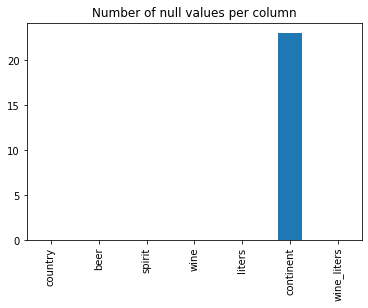

In [157]:
# Count the missing values in each column — remember by default, axis=0.
print((drinks.isnull().sum()))

drinks.isnull().sum().plot(kind='bar');         # visually
plt.title('Number of null values per column');

**Dropping Missing Values**

In [158]:
# Drop a row if ANY values are missing from any column — can be dangerous!
drinks.dropna()

,country,beer,spirit,wine,liters,continent,wine_liters
0,Afghanistan,0,0,0,0.0,AS,0.0
1,Albania,89,132,54,4.9,EU,58.9
2,Algeria,25,0,14,0.7,AF,14.7
3,Andorra,245,138,312,12.4,EU,324.4
4,Angola,217,57,45,5.9,AF,50.9
...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,10.7
189,Vietnam,111,2,1,2.0,AS,3.0
190,Yemen,6,0,0,0.1,AS,0.1
191,Zambia,32,19,4,2.5,AF,6.5


In [159]:
# Drop a row only if ALL values are missing.
drinks.dropna(how='all')

,country,beer,spirit,wine,liters,continent,wine_liters
0,Afghanistan,0,0,0,0.0,AS,0.0
1,Albania,89,132,54,4.9,EU,58.9
2,Algeria,25,0,14,0.7,AF,14.7
3,Andorra,245,138,312,12.4,EU,324.4
4,Angola,217,57,45,5.9,AF,50.9
...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,10.7
189,Vietnam,111,2,1,2.0,AS,3.0
190,Yemen,6,0,0,0.1,AS,0.1
191,Zambia,32,19,4,2.5,AF,6.5


**Filling Missing Values**<br>
You may have noticed that the continent North America (NA) does not appear in the `continent` column. Pandas read in the original data and saw "NA", thought it was a missing value, and converted it to a `NaN`, missing value.

In [160]:
# Fill in missing values with "NA" — this is dangerous to do without manually verifying them!
drinks.continent.fillna(value='NA')

0      AS
1      EU
2      AF
3      EU
4      AF
       ..
188    SA
189    AS
190    AS
191    AF
192    AF
Name: continent, Length: 193, dtype: object

In [161]:
# Modifies "drinks" in-place
drinks.continent.fillna(value='NA', inplace=True)

In [162]:
# Turn off the missing value filter — this is a better approach!
drinks = pd.read_csv('data/drinks.csv', header=0, names=drink_cols, na_filter=False)

In [163]:
drinks.continent.value_counts()

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

In [164]:
drinks.isnull().sum()

country      0
beer         0
spirit       0
wine         0
liters       0
continent    0
dtype: int64

<a id="exercise-three"></a>
### Exercise 3

In [22]:
# Read ufo.csv into a DataFrame called "ufo".
ufo_data = 'data/ufo.csv'
ufo = pd.read_csv(ufo_data)

In [25]:
# Check the shape of the DataFrame.
ufo.shape

(80543, 5)

In [44]:
# What are the three most common colors reported?
ufo.Colors.value_counts().head(3)


ORANGE    5216
RED       4809
GREEN     1897
Name: Colors, dtype: int64

In [42]:
# Rename any columns with spaces so that they don't contain spaces.
ufo.columns
ufo.rename(columns={'Colors_Reported':'Colors', 'Shape_Reported':'Shape'}, inplace=True)

In [48]:
# For reports in VA, what's the most common city?
ufo[ufo['State']=='VA'].City.value_counts().head(1)

Virginia Beach    110
Name: City, dtype: int64

In [51]:
# Print a DataFrame containing only reports from Arlington, VA.
ufo[(ufo['State']=='VA') & (ufo['City']=='Arlington')]

,City,Colors,Shape,State,Time
202,Arlington,GREEN,OVAL,VA,7/13/1952 21:00
6300,Arlington,NaN,CHEVRON,VA,5/5/1990 21:40
10278,Arlington,NaN,DISK,VA,5/27/1997 15:30
14527,Arlington,NaN,OTHER,VA,9/10/1999 21:41
17984,Arlington,RED,DISK,VA,11/19/2000 22:00
21201,Arlington,GREEN,FIREBALL,VA,1/7/2002 17:45
22633,Arlington,NaN,LIGHT,VA,7/26/2002 1:15
22780,Arlington,NaN,LIGHT,VA,8/7/2002 21:00
25066,Arlington,NaN,CIGAR,VA,6/1/2003 22:34
27398,Arlington,NaN,VARIOUS,VA,12/13/2003 2:00


In [52]:
# Count the number of missing values in each column.
print((ufo.isnull().sum()))

City         47
Colors    63509
Shape      8402
State         0
Time          0
dtype: int64


In [53]:
# How many rows remain if you drop all rows with any missing values?
ufo.dropna()

,City,Colors,Shape,State,Time
12,Belton,RED,SPHERE,SC,6/30/1939 20:00
19,Bering Sea,RED,OTHER,AK,4/30/1943 23:00
36,Portsmouth,RED,FORMATION,VA,7/10/1945 1:30
44,Blairsden,GREEN,SPHERE,CA,6/30/1946 19:00
82,San Jose,BLUE,CHEVRON,CA,7/15/1947 21:00
...,...,...,...,...,...
80524,Olympia,RED,LIGHT,WA,9/4/2014 21:10
80525,Iowa City,BLUE,LIGHT,IA,9/4/2014 21:11
80528,North Royalton,RED,TRIANGLE,OH,9/4/2014 21:30
80536,Wyoming,RED,DISK,PA,9/4/2014 23:00


<a id="split-apply-combine"></a>
### Split-Apply-Combine

Split-apply-combine is a pattern for analyzing data. Suppose we want to find mean beer consumption per country. Then:

- **Split:** We group data by continent.
- **Apply:** For each group, we apply the `mean()` function to find the average beer consumption.
- **Combine:** We now combine the continent names with the `mean()`s to produce a summary of our findings.

In [54]:
# For each continent, calculate the mean beer servings.
drinks.groupby('continent').beer.mean()

continent
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
SA    175.083333
Name: beer, dtype: float64

In [174]:
# For each continent, calculate the mean of all numeric columns.
drinks.groupby('continent').mean()

,beer,spirit,wine,liters
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


In [175]:
# For each continent, describe beer servings.
drinks.groupby('continent').beer.describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,61.471698,80.557816,0.0,15.00,32.0,76.00,376.0
AS,44.0,37.045455,49.469725,0.0,4.25,17.5,60.50,247.0
EU,45.0,193.777778,99.631569,0.0,127.00,219.0,270.00,361.0
NA,23.0,145.434783,79.621163,1.0,80.00,143.0,198.00,285.0
OC,16.0,89.687500,96.641412,0.0,21.00,52.5,125.75,306.0
SA,12.0,175.083333,65.242845,93.0,129.50,162.5,198.00,333.0


In [176]:
# Similar, but outputs a DataFrame and can be customized — "agg" allows you to aggregate results of Series functions
drinks.groupby('continent').beer.agg(['count', 'mean', 'min', 'max'])
drinks.groupby('continent').beer.agg(['count', 'mean', 'min', 'max']).sort_values('mean')

,count,mean,min,max
continent,,,,
AS,44,37.045455,0,247
AF,53,61.471698,0,376
OC,16,89.687500,0,306
NA,23,145.434783,1,285
SA,12,175.083333,93,333
EU,45,193.777778,0,361


In [177]:
# For each continent, describe all numeric columns.
drinks.groupby('continent').describe()

beer                                                             \
          count        mean        std   min     25%    50%     75%    max   
continent                                                                    
AF         53.0   61.471698  80.557816   0.0   15.00   32.0   76.00  376.0   
AS         44.0   37.045455  49.469725   0.0    4.25   17.5   60.50  247.0   
EU         45.0  193.777778  99.631569   0.0  127.00  219.0  270.00  361.0   
NA         23.0  145.434783  79.621163   1.0   80.00  143.0  198.00  285.0   
OC         16.0   89.687500  96.641412   0.0   21.00   52.5  125.75  306.0   
SA         12.0  175.083333  65.242845  93.0  129.50  162.5  198.00  333.0   

          spirit              ...    wine        liters                      \
           count        mean  ...     75%    max  count      mean       std   
continent                     ...                                             
AF          53.0   16.339623  ...   13.00  233.0   53.0  3.007547  2.647557   
AS          44.0   60.840909  ...    8.00  123.0   44.0  2.170455  2.770239   
EU          45.0  132.555556  ...  195.00  370.0   45.0  8.617778  3.358455   
NA          23.0  165.739130  ...   34.00  100.0   23.0  5.995652  2.409353   
OC          16.0   58.437500  ...   23.25  212.0   16.0  3.381250  3.345688   
SA          12.0  114.750000  ...   98.50  221.0   12.0  6.308333  1.531166   

                                           
           min   25%    50%     75%   max  
continent                                  
AF         0.0  0.70   2.30   4.700   9.1  
AS         0.0  0.10   1.20   2.425  11.5  
EU         0.0  6.60  10.00  10.900  14.4  
NA         2.2  4.30   6.30   7.000  11.9  
OC         0.0  1.00   1.75   6.150  10.4  
SA         3.8  5.25   6.85   7.375   8.3  

[6 rows x 32 columns]

In [178]:
# For each continent, count the number of rows.
print((drinks.groupby('continent').continent.count()))
print((drinks.continent.value_counts()))   # should be the same

continent
AF    53
AS    44
EU    45
NA    23
OC    16
SA    12
Name: continent, dtype: int64
AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64


<a id="exercise-four"></a>
### Exercise 4

Use the "users" `DataFrame` or "users" file in the Data folder to complete the following.

In [83]:
# For each occupation in "users", count the number of occurrences.
users.head()
users.groupby('occupation').count()

,user_id,age,gender,zip_code
occupation,,,,
administrator,79,79,79,79
artist,28,28,28,28
doctor,7,7,7,7
educator,95,95,95,95
engineer,67,67,67,67
entertainment,18,18,18,18
executive,32,32,32,32
healthcare,16,16,16,16
homemaker,7,7,7,7


In [84]:
# For each occupation, calculate the mean age.
users.groupby('occupation')['age'].mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [85]:
# For each occupation, calculate the minimum and maximum ages.
users.groupby('occupation')['age'].agg(['min','max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [88]:
# For each combination of occupation and gender, calculate the mean age.
users.groupby(['occupation', 'gender'])['age'].mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

----

<a id="multiple-columns"></a>
### Selecting Multiple Columns and Filtering Rows

In [183]:
# Select multiple columns — yet another overload of the DataFrame indexing operator!
my_cols = ['City', 'State']     # Create a list of column names...
ufo[my_cols]                    # ...and use that list to select columns.

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY
...,...,...
80538,Neligh,NE
80539,Uhrichsville,OH
80540,Tucson,AZ
80541,Orland park,IL


In [184]:
# Or, combine into a single step (this is a Python list inside of the Python index operator!).
ufo[['City', 'State']]

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY
...,...,...
80538,Neligh,NE
80539,Uhrichsville,OH
80540,Tucson,AZ
80541,Orland park,IL


**Use `loc` to select columns by name.**

In [93]:
# "loc" locates the values from the first parameter (colon means "all rows"), and the column "City".
ufo.loc[:, 'City']  

0                      Ithaca
1                 Willingboro
2                     Holyoke
3                     Abilene
4        New York Worlds Fair
                 ...         
80538                  Neligh
80539            Uhrichsville
80540                  Tucson
80541             Orland park
80542                Loughman
Name: City, Length: 80543, dtype: object

In [186]:
# Select two columns.
ufo.loc[:, ['City', 'State']]

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY
...,...,...
80538,Neligh,NE
80539,Uhrichsville,OH
80540,Tucson,AZ
80541,Orland park,IL


In [187]:
# Select a range of columns — unlike Python ranges, Pandas index ranges INCLUDE the final column in the range.
ufo.loc[:, 'City':'State']

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY
...,...,...,...,...
80538,Neligh,NaN,CIRCLE,NE
80539,Uhrichsville,NaN,LIGHT,OH
80540,Tucson,RED BLUE,NaN,AZ
80541,Orland park,RED,LIGHT,IL


In [188]:
# "loc" can also filter rows by "name" (the index).
# Row 0, all columns
ufo.loc[0, :]

City                       Ithaca
Colors Reported               NaN
Shape Reported           TRIANGLE
State                          NY
Time               6/1/1930 22:00
Name: 0, dtype: object

In [94]:
# Rows 0/1/2, all columns
ufo.loc[0:2, :]

,City,Colors,Shape,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [95]:
# Rows 0/1/2, range of columns
ufo.loc[0:2, 'City':'State'] 

,City,Colors,Shape,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO


In [96]:
# Use "iloc" to filter rows and select columns by integer position.
# (Remember that rows/columns use indices, so "iloc" lets you refer to indices via their index rather than value!)
# All rows, columns in position 0/3 (City/State)
ufo.iloc[:, [0, 3]]

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY
...,...,...
80538,Neligh,NE
80539,Uhrichsville,OH
80540,Tucson,AZ
80541,Orland park,IL


In [97]:
# All rows, columns in position 0/1/2/3
# Note here it is NOT INCLUDING 4 because this is an integer range, not a Pandas index range!
ufo.iloc[:, 0:4]

,City,Colors,Shape,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY
...,...,...,...,...
80538,Neligh,NaN,CIRCLE,NE
80539,Uhrichsville,NaN,LIGHT,OH
80540,Tucson,RED BLUE,NaN,AZ
80541,Orland park,RED,LIGHT,IL


In [98]:
# Rows in position 0/1/2, all columns
ufo.iloc[0:3, :] 

,City,Colors,Shape,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


<a id="joining-dataframes"></a>
### Joining (Merging) `DataFrames`

In [101]:
import pandas as pd
movie_cols = ['movie_id', 'title']
movies_filename = 'data/movies.tbl'

movies = pd.read_table(
    movies_filename,
    sep='|',
    header=None,
    names=movie_cols,
    usecols=[0, 1],
    encoding='latin-1')

movies.head()

,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [102]:
rating_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings_filename = 'data/movie_ratings.tsv'

ratings = pd.read_table(ratings_filename, sep='\t', header=None, names=rating_cols)
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [130]:
# Merge "movies" and "ratings" (inner join on "movie_id").
movie_ratings = pd.merge(movies, ratings)
movie_ratings.head()

,movie_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324


In [131]:
print(movies.shape)
print(ratings.shape)
print(movie_ratings.shape)

(1682, 2)
(100000, 4)
(100000, 5)


<a id="other-features"></a>
### OPTIONAL: Other Commonly Used Features

In [105]:
# Apply an arbitrary function to each value of a Pandas column, storing the result in a new column.
# Apply means apply this function to the data or part of the data set of interest
# This asks "is the age under 30?" and lamda goes through and enters yes or no
users['under30'] = users.age.apply(lambda age: age < 30)
users.head()

,user_id,age,gender,occupation,zip_code,under30
0,1,24,M,technician,85711,True
1,2,53,F,other,94043,False
2,3,23,M,writer,32067,True
3,4,24,M,technician,43537,True
4,5,33,F,other,15213,False


In [112]:
# Apply an arbitrary function to each row of a DataFrame, storing the result in a new column.
#  (Remember that, by default, axis=0. Since we want to go row by row, we set axis=1.)
# by setting axis=1, if row already=under30 AND then male, use that for T/F
users['under30male'] = users.apply(lambda row: row.age < 30 and row.gender == 'M', axis=1)


users.head()

,user_id,age,gender,occupation,zip_code,under30,under30male,is_male
0,1,24,M,technician,85711,True,True,1
1,2,53,F,other,94043,False,False,0
2,3,23,M,writer,32067,True,True,1
3,4,24,M,technician,43537,True,True,1
4,5,33,F,other,15213,False,False,0


In [110]:
# Map existing values to a different set of values.
# DUMMY CODING!!!!
users['is_male'] = users.gender.map({'F':0, 'M':1})
users.head()

,user_id,age,gender,occupation,zip_code,under30,under30male,is_male
0,1,24,M,technician,85711,True,True,1
1,2,53,F,other,94043,False,False,0
2,3,23,M,writer,32067,True,True,1
3,4,24,M,technician,43537,True,True,1
4,5,33,F,other,15213,False,False,0


In [114]:
# Replace all instances of a value in a column (must match entire value).
ufo.State.replace('Fl', 'FL', inplace=True)
ufo.head()

,City,Colors,Shape,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [116]:
# String methods are accessed via "str".
ufo.State.str.upper()                               # Converts to upper case
# checks for a substring
ufo['Colors'].str.contains('RED', na='False') 

0        False
1        False
2        False
3        False
4        False
         ...  
80538    False
80539    False
80540     True
80541     True
80542    False
Name: Colors, Length: 80543, dtype: object

In [ ]:
# Convert a string to the datetime format (this is often slow — consider doing it in the "read_csv()" method.)
# I CAN USE THIS FOR THE TEST-RETEST STUDY!!!!!!!!
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo.Time.dt.hour                        # Datetime format exposes convenient attributes
(ufo.Time.max() - ufo.Time.min()).days  # Also allows you to do datetime "math"

In [ ]:
# Set and then remove an index.
ufo.set_index('Time', inplace=True)
ufo.reset_index(inplace=True)

In [ ]:
# Change the datatype of a column.
drinks['beer'] = drinks.beer.astype('float')

In [ ]:
# Create dummy variables for "continent" and exclude first dummy column.
continent_dummies = pd.get_dummies(drinks.continent, prefix='cont').iloc[:, 1:]

In [ ]:
# Concatenate two DataFrames (axis=0 for rows, axis=1 for columns).
drinks = pd.concat([drinks, continent_dummies], axis=1)

<a id="uncommon-features"></a>
### OPTIONAL: Other Less-Used Features of Pandas

In [ ]:
# Detecting duplicate rows
users.duplicated()          # True if a row is identical to a previous row
users.duplicated().sum()    # Count of duplicates
users[users.duplicated()]   # Only show duplicates
users.drop_duplicates()     # Drop duplicate rows
users.age.duplicated()      # Check a single column for duplicates
users.duplicated(['age', 'gender', 'zip_code']).sum()   # Specify columns for finding duplicates

In [ ]:
# Convert a range of values into descriptive groups.
drinks['beer_level'] = 'low'    # Initially set all values to "low"
drinks.loc[drinks.beer.between(101, 200), 'beer_level'] = 'med'     # Change 101-200 to "med"
drinks.loc[drinks.beer.between(201, 400), 'beer_level'] = 'high'    # Change 201-400 to "high"

In [ ]:
# Display a cross-tabulation of two Series.
pd.crosstab(drinks.continent, drinks.beer_level)

In [ ]:
# Convert "beer_level" into the "category" datatype.
drinks['beer_level'] = pd.Categorical(drinks.beer_level, categories=['low', 'med', 'high'])
drinks.sort_values('beer_level')   # Sorts by the categorical ordering (low to high)

In [ ]:
# Limit which rows are read when reading in a file — useful for large files!
pd.read_csv('data/drinks.csv', nrows=10)           # Only read first 10 rows
pd.read_csv('data/drinks.csv', skiprows=[1, 2])    # Skip the first two rows of data

In [ ]:
# Write a DataFrame out to a .csv
drinks.to_csv('drinks_updated.csv')                 # Index is used as first column
drinks.to_csv('drinks_updated.csv', index=False)    # Ignore index

In [ ]:
# Create a DataFrame from a dictionary.
pd.DataFrame({'capital':['Montgomery', 'Juneau', 'Phoenix'], 'state':['AL', 'AK', 'AZ']})

In [ ]:
# Create a DataFrame from a list of lists.
pd.DataFrame([['Montgomery', 'AL'], ['Juneau', 'AK'], ['Phoenix', 'AZ']], columns=['capital', 'state'])

In [ ]:
# Randomly sample a DataFrame.
import numpy as np
mask = np.random.rand(len(drinks)) < 0.66   # Create a Series of Booleans
train = drinks[mask]                        # Will contain around 66% of the rows
test = drinks[~mask]                        # Will contain the remaining rows

In [ ]:
# Change the maximum number of rows and columns printed ('None' means unlimited).
pd.set_option('max_rows', None)     # Default is 60 rows
pd.set_option('max_columns', None)  # Default is 20 columns
print(drinks)

In [ ]:
# Reset options to defaults.
pd.reset_option('max_rows')
pd.reset_option('max_columns')

In [ ]:
# Change the options temporarily (settings are restored when you exit the "with" block).
with pd.option_context('max_rows', None, 'max_columns', None):
    print(drinks)

<a id="summary"></a>
### Summary

Believe it or not, we've only barely touched the surface of everything that Pandas offers. Don't worry if you don't remember most of it — for now, just knowing what exists is key. Remember that the more you use Pandas to manipulate data, the more of these functions you will take interest in, look up, and remember.

In this notebook, the most important things to familiarize yourself with are the basics:
- Manipulating `DataFrames` and `Series`
- Filtering columns and rows
- Handling missing values
- Split-apply-combine (this one takes some practice!)